In [1]:
# !pip install pandas yfinance matplotlib prophet

In [2]:
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
# Step 1: Fetch the data using yfinance
dat = yf.Ticker("SOXL")
# df = dat.history(start="2021-01-01")
df = dat.history(period='max')

# Define the stock ticker and the time period
ticker = "SOXL"
end_time = datetime.now()
start_time = end_time - timedelta(days=1)  # Last day

In [3]:
# df has 2010-03-11 00:00:00-05:00 in the index, instead I want 2010-03-11
df.index = df.index.map(lambda x: x.replace(tzinfo=None))

In [4]:
# drop the columns 'Dividends', 'Stock Splits', and 'Capital Gains'
df.drop(columns=['Dividends', 'Stock Splits', 'Capital Gains'], inplace=True)
df


,Open,High,Low,Close,Volume
Date,,,,,
2010-03-11,0.589992,0.606521,0.589992,0.606521,3702000
2010-03-12,0.606980,0.610959,0.591523,0.591523,4548000
2010-03-15,0.579586,0.585860,0.563975,0.572851,534000
2010-03-16,0.580045,0.619990,0.579126,0.619377,1260000
2010-03-17,0.642793,0.649221,0.630091,0.641721,2610000
...,...,...,...,...,...
2024-11-20,27.340000,27.559999,26.000000,27.129999,90911700
2024-11-21,28.049999,28.920000,26.469999,28.490000,106013200
2024-11-22,28.250000,28.690001,27.840000,28.490000,52604100


In [5]:
# add open_close_diff, high_low_diff columns
df['open_close_diff'] = df['Open'] - df['Close']
df['high_low_diff'] = df['High'] - df['Low']
df


,Open,High,Low,Close,Volume,open_close_diff,high_low_diff
Date,,,,,,,
2010-03-11,0.589992,0.606521,0.589992,0.606521,3702000,-0.016529,0.016529
2010-03-12,0.606980,0.610959,0.591523,0.591523,4548000,0.015457,0.019436
2010-03-15,0.579586,0.585860,0.563975,0.572851,534000,0.006735,0.021885
2010-03-16,0.580045,0.619990,0.579126,0.619377,1260000,-0.039332,0.040863
2010-03-17,0.642793,0.649221,0.630091,0.641721,2610000,0.001072,0.019130
...,...,...,...,...,...,...,...
2024-11-20,27.340000,27.559999,26.000000,27.129999,90911700,0.210001,1.559999
2024-11-21,28.049999,28.920000,26.469999,28.490000,106013200,-0.440001,2.450001
2024-11-22,28.250000,28.690001,27.840000,28.490000,52604100,-0.240000,0.850000


<Figure size 2000x800 with 0 Axes>

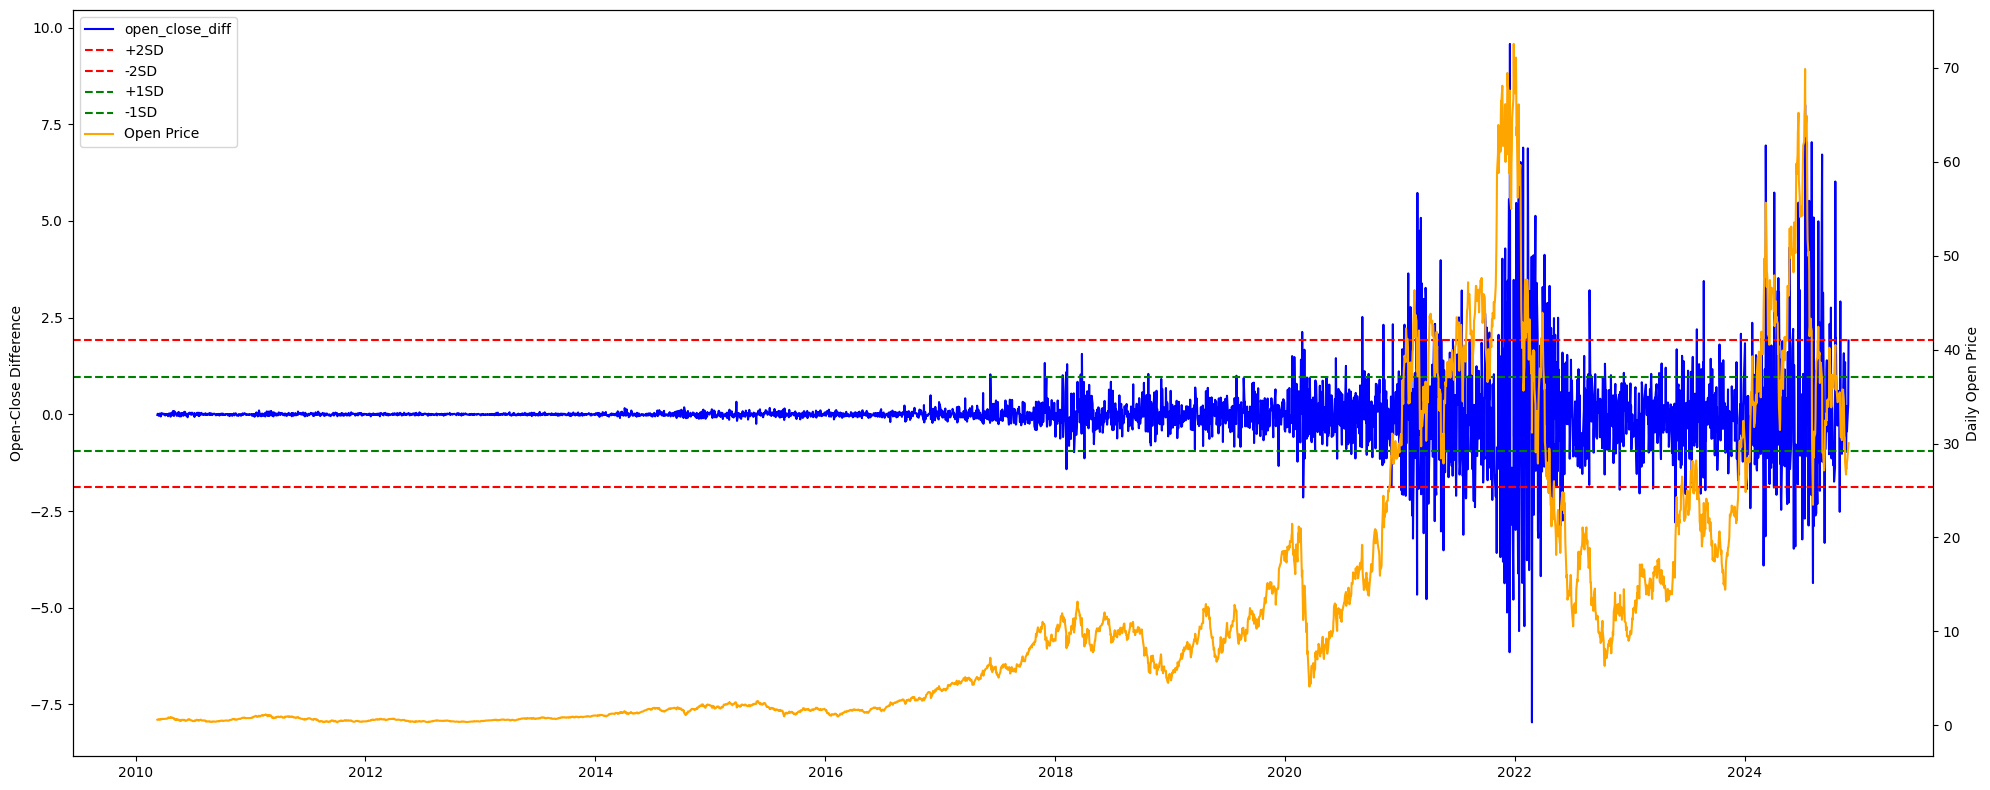

In [6]:
# plot open_close_diff and high_low_diff with 2SD and 1SD lines
plt.figure(figsize=(20, 8))  # Set a wider figure size
fig, ax1 = plt.subplots(figsize=(20, 8))  # Create subplot with wider size

# Plot open_close_diff on left y-axis
ax1.plot(df['open_close_diff'], label='open_close_diff', color='blue')
# plt.plot(df['high_low_diff'], label='high_low_diff')

# Calculate and plot 2 standard deviations and 1 standard deviation
mean = df['open_close_diff'].mean()
std = df['open_close_diff'].std()
ax1.axhline(y=mean + 2*std, color='r', linestyle='--', label='+2SD')
ax1.axhline(y=mean - 2*std, color='r', linestyle='--', label='-2SD')
ax1.axhline(y=mean + std, color='g', linestyle='--', label='+1SD')
ax1.axhline(y=mean - std, color='g', linestyle='--', label='-1SD')

# Create second y-axis and plot Open price
ax2 = ax1.twinx()
ax2.plot(df['Open'], label='Open Price', color='orange')

# Set labels for both y-axes
ax1.set_ylabel('Open-Close Difference')
ax2.set_ylabel('Daily Open Price')

# Add legends for both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()  # Adjust layout to use maximum space
plt.show()


Number of data points: 3705

First few rows:
           ds         y
0  2010-03-11  0.589992
1  2010-03-12  0.606980
2  2010-03-15  0.579586
3  2010-03-16  0.580045
4  2010-03-17  0.642793

Last few rows:
              ds          y
3700  2024-11-20  27.340000
3701  2024-11-21  28.049999
3702  2024-11-22  28.250000
3703  2024-11-25  29.580000
3704  2024-11-26  30.040001


16:02:38 - cmdstanpy - INFO - Chain [1] start processing
16:02:39 - cmdstanpy - INFO - Chain [1] done processing


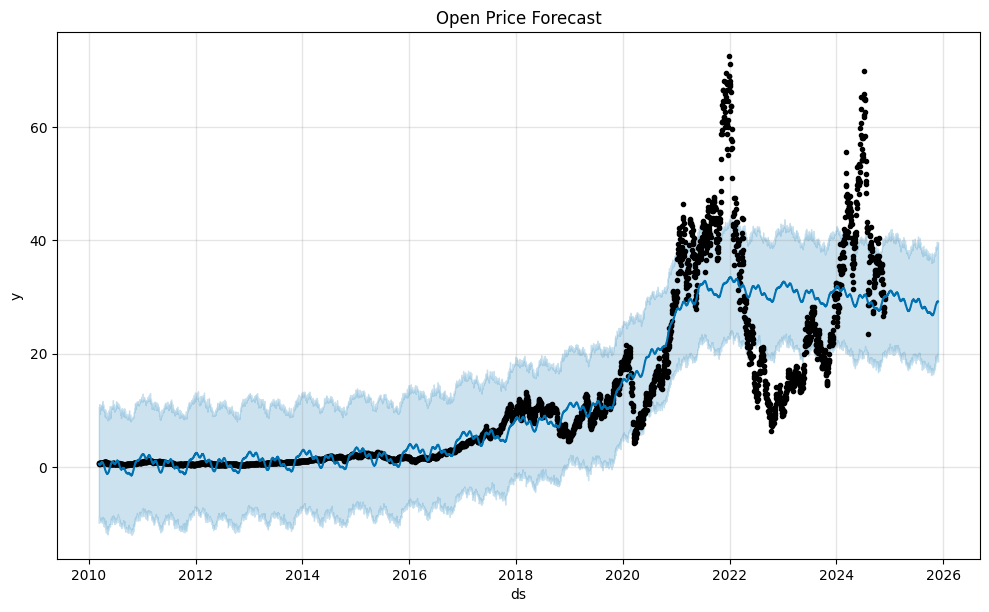

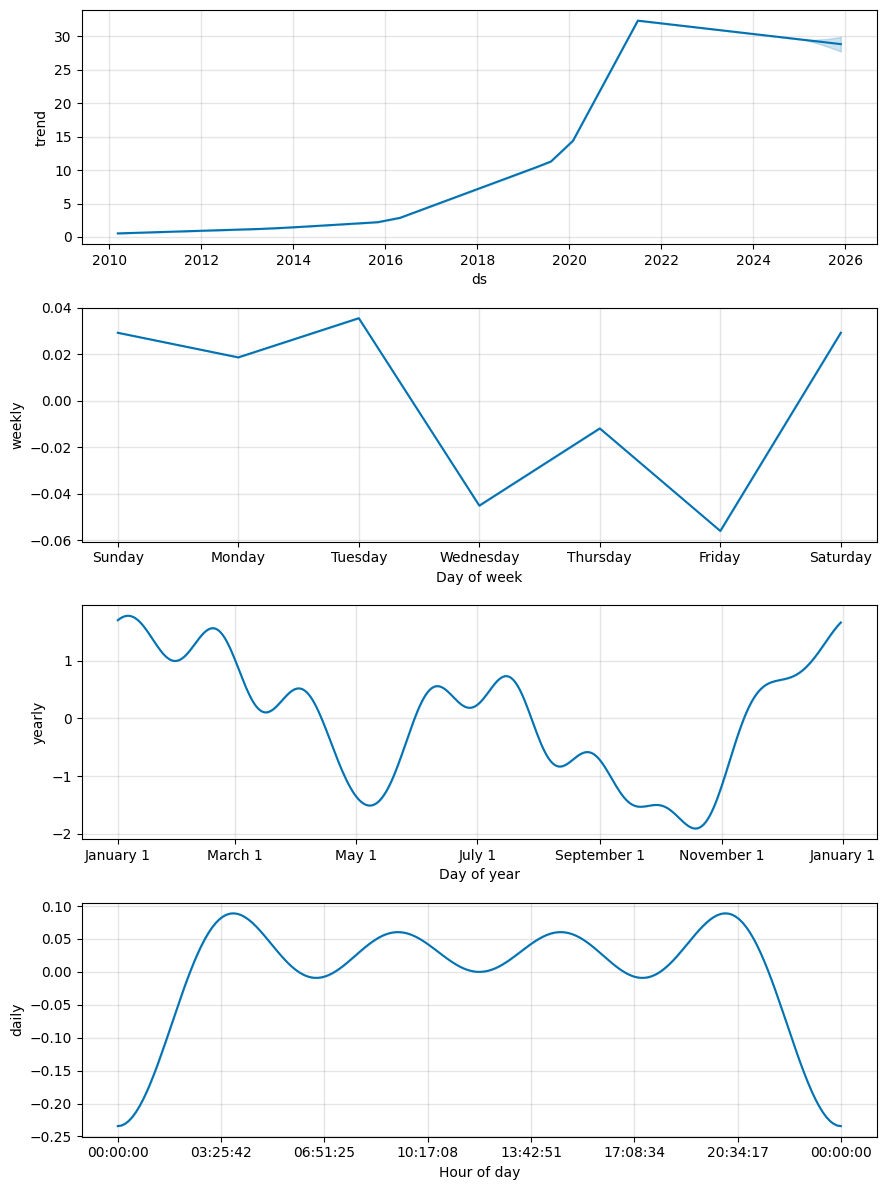


Last few predictions:
             ds       yhat  yhat_lower  yhat_upper
4065 2025-11-22  29.198287   19.244029   38.947999
4066 2025-11-23  29.221279   20.012380   39.665166
4067 2025-11-24  29.229396   19.508287   39.670267
4068 2025-11-25  29.261217   18.911708   39.278095
4069 2025-11-26  29.192433   18.583209   39.625539


In [12]:
# This code uses Facebook's Prophet library to forecast stock prices
# The output shows:
# 1. Data preparation and validation:
#    - 3705 total data points from 2010 to 2024
#    - First rows show prices around $0.59 (March 2010)
#    - Last rows show prices around $27-30 (November 2024)
#    This indicates significant price growth over 14 years

# 2. Model training:
#    - The cmdstanpy output shows the Prophet model training process
#    - Training completed successfully in 2 seconds (15:58:34 to 15:58:36)

# 3. The plots below show:
#    - Forecast plot: Historical data + 30 day future predictions with uncertainty intervals
#    - Components plot: Breakdown of the forecast into:
#      * Overall trend
#      * Yearly seasonality patterns  
#      * Weekly seasonality patterns
#      * Daily seasonality patterns

from prophet import Prophet

# Prepare data for Prophet
prophet_df = pd.DataFrame()
prophet_df['ds'] = df.index.strftime('%Y-%m-%d')  # Convert datetime index to string dates
prophet_df['y'] = df['Open'].values  # Use values to avoid index issues

# Check for and remove any NaN values
prophet_df = prophet_df.dropna()

# Print data info before proceeding
print(f"Number of data points: {len(prophet_df)}")
print("\nFirst few rows:")
print(prophet_df.head())
print("\nLast few rows:") 
print(prophet_df.tail())

# Verify we have enough data and data quality
if len(prophet_df) < 2:
    print("Error: Not enough valid data points for prediction")
elif prophet_df['y'].isnull().any():
    print("Error: Dataset contains null values in target column")
elif not pd.to_datetime(prophet_df['ds'], errors='coerce').notnull().all():
    print("Error: Dataset contains invalid dates")
else:
    # Initialize and fit Prophet model
    m = Prophet(daily_seasonality=True)
    m.fit(prophet_df)

    # Create future dates dataframe
    future = m.make_future_dataframe(periods=365)

    # Make predictions
    forecast = m.predict(future)

    # Plot the forecast
    fig = m.plot(forecast)
    plt.title('Open Price Forecast')
    plt.show()

    # Plot components of the forecast (trend, seasonality)
    fig2 = m.plot_components(forecast)
    plt.show()

    # Display the last few predictions
    print("\nLast few predictions:")
    print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())


In [13]:
# Other out-of-the-box automated forecasting methods:
# 1. PyCaret Time Series Forecasting
# 2. NeuralProphet
# 3. AutoTS
# 4. Nixtla
# 5. TPOT
# 6. sktime
# 7. skforecast

In [14]:
# 1. PyCaret Time Series Forecasting
! pip install pycaret

ERROR: Could not find a version that satisfies the requirement pycaret-ts-forecasting (from versions: none)
ERROR: No matching distribution found for pycaret-ts-forecasting

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [20]:
from pycaret.time_series import TSForecastingExperiment
from pycaret.utils.time_series import clean_time_index

# Convert index to datetime with daily frequency and fill missing dates
df.index = df.index.to_timestamp() # Fixed error by calling to_timestamp() directly on index
df = clean_time_index(data=df, freq='D')

exp = TSForecastingExperiment()
exp.setup(data=df['Open'], fh=7, fold=10, session_id=42, n_jobs=-1, use_gpu=False,
          numeric_imputation_target='mean')  # Enable imputation to handle missing values

,Description,Value
0,session_id,42
1,Target,Open
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(5375, 1)"
5,Transformed data shape,"(5375, 1)"
6,Transformed train set shape,"(5368, 1)"
7,Transformed test set shape,"(7, 1)"
8,Rows with missing values,31.1%
9,Fold Generator,ExpandingWindowSplitter


In [21]:

# Train and compare models
best_model = exp.compare_models(sort='MAE', turbo=True)

# Finalize the model and predict future values
final_model = exp.finalize_model(best_model)
forecast = exp.predict_model(final_model)


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
ets,ETS,1.5906,0.6816,2.0235,2.6240,0.0641,0.0638,0.9095,0.4230
exp_smooth,Exponential Smoothing,1.6149,0.7029,2.0544,2.7061,0.0643,0.0629,0.9021,0.8650
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,1.7051,0.7553,2.1695,2.9076,0.0673,0.0665,0.8966,0.0680
arima,ARIMA,1.7061,0.7499,2.1707,2.8868,0.0676,0.0667,0.8960,0.0660
catboost_cds_dt,CatBoost Regressor w/ Cond. Deseasonalize & Detrending,1.7196,0.7515,2.1879,2.8927,0.0693,0.0681,0.8784,0.6150
snaive,Seasonal Naive Forecaster,1.7196,0.7564,2.1879,2.9116,0.0685,0.0677,0.8960,0.2420
stlf,STLF,1.7765,0.7490,2.2597,2.8836,0.0789,0.0796,0.9004,0.0430
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,1.8959,0.7573,2.4119,2.9155,0.0872,0.0868,0.9010,0.0620
auto_arima,Auto ARIMA,1.9533,0.7698,2.4840,2.9640,0.0985,0.1046,0.8900,82.7920
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,1.9547,0.7742,2.4865,2.9805,0.0908,0.0897,0.8872,0.4000


In [22]:

# Plot the forecast
exp.plot_model(final_model, plot='forecast')
plt.show()


In [23]:
# 2. NeuralProphet
!pip install neuralprophet

  Obtaining dependency information for neuralprophet from https://files.pythonhosted.org/packages/71/a3/a60eedc2c160f81e841bbfb1f3bd7cba2369ff04187614f732da667fd1c3/neuralprophet-0.9.0-py3-none-any.whl.metadata
  Obtaining dependency information for captum>=0.6.0 from https://files.pythonhosted.org/packages/e1/76/b21bfd2c35cab2e9a4b68b1977f7488c246c8cffa31e3361ee7610e8b5af/captum-0.7.0-py3-none-any.whl.metadata
  Obtaining dependency information for pytorch-lightning>=2.0.0 from https://files.pythonhosted.org/packages/2b/d2/ecd65ff1e0b1ca79f9785dd65d5ced7ec2643a828068aaa24e47e4c84a14/pytorch_lightning-2.4.0-py3-none-any.whl.metadata
  Using cached pytorch_lightning-2.4.0-py3-none-any.whl.metadata (21 kB)
  Obtaining dependency information for torch>=2.0.0 from https://files.pythonhosted.org/packages/3b/55/7192974ab13e5e5577f45d14ce70d42f5a9a686b4f57bbe8c9ab45c4a61a/torch-2.2.2-cp310-none-macosx_10_9_x86_64.whl.metadata
  Using cached torch-2.2.2-cp310-none-macosx_10_9_x86_64.whl.metada

In [32]:
from neuralprophet import NeuralProphet

# Prepare dataframe in required format for NeuralProphet
df_prophet = df.reset_index()
# Convert index to timestamp before proceeding
df_prophet['ds'] = pd.to_datetime(df_prophet.index)
df_prophet = df_prophet[['ds', 'Open']].rename(columns={'Open': 'y'})

m = NeuralProphet()
metrics = m.fit(df_prophet, freq='D')
forecast = m.predict(df_prophet)
fig = m.plot(forecast)
plt.show()

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency N corresponds to 99.981% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency D is different than major frequency N
INFO - (NP.data.processing._handle_missing_data) - Dropped 1670 rows with NaNs in 'y' column.
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (58) is too small than the required number                     for the learning rate finder (239). The results might not be optimal.
2024-11-26 17:02:45.937808: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Finding best initial lr:   0%|          | 0/239 [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/pytorch_lightning/utilities/data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 64. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/pytorch_lightning/utilities/data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 57. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.



Training: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency N corresponds to 99.981% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency D is different than major frequency N
INFO - (NP.df_utils._infer_frequency) - Major frequency N corresponds to 99.981% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency D is different than major frequency N


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/neuralprophet/plot_forecast_plotly.py:100: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




In [33]:
# 3. AutoTS
!pip install autots

  Obtaining dependency information for autots from https://files.pythonhosted.org/packages/0a/46/6bb241ad4b504d7022c7bdd780b229ee1c81c5ba677c7544d5fbe879ce4d/autots-0.6.16-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 947.7/947.7 kB 13.7 MB/s eta 0:00:0000:01

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [40]:
from autots import AutoTS

# The index is already a DatetimeIndex, no need to convert
# Just proceed with model creation and fitting
model = AutoTS(
    forecast_length=30,  # Reduced from 365 to 30 days
    frequency='D',
    ensemble='simple', 
    drop_data_older_than_periods=365,
    min_allowed_train_percent=0.2  # Allow smaller training set
)
model = model.fit(df)
prediction = model.predict(forecast_length=30)  # Match the model's forecast length
forecast = prediction.forecast
fig = model.plot(prediction)
plt.show()

Using 4 cpus for n_jobs.
Data frequency is: D, used frequency is: D
Old data dropped by `drop_data_older_than_periods`.
Model Number: 1 with model AverageValueNaive in generation 0 of 25
Model Number: 2 with model AverageValueNaive in generation 0 of 25
Model Number: 3 with model AverageValueNaive in generation 0 of 25
Model Number: 4 with model DatepartRegression in generation 0 of 25
Model Number: 5 with model DatepartRegression in generation 0 of 25


/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` expli

Model Number: 6 with model DatepartRegression in generation 0 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html




Model Number: 7 with model DatepartRegression in generation 0 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.




Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.3865
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3831 
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3810 
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3794 
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3775 
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3730 
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3680 
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3623 
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3517 
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3434 
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3284 
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3131 
Epoch 13/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3051 
Epoch 14/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2990 
Epoch 15/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2935 
Epoch

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html




Model Number: 24 with model ConstantNaive in generation 0 of 25
Model Number: 25 with model FBProphet in generation 0 of 25


17:05:59 - cmdstanpy - INFO - Chain [1] start processing
17:05:59 - cmdstanpy - INFO - Chain [1] start processing
17:05:59 - cmdstanpy - INFO - Chain [1] start processing
17:05:59 - cmdstanpy - INFO - Chain [1] start processing
17:05:59 - cmdstanpy - INFO - Chain [1] done processing
17:05:59 - cmdstanpy - INFO - Chain [1] done processing
17:05:59 - cmdstanpy - INFO - Chain [1] done processing
17:05:59 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 26 with model DatepartRegression in generation 0 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 26 in generation 0: DatepartRegression
Model Number: 27 with model SeasonalNaive in generation 0 of 25
Model Number: 28 with model DatepartRegression in generation 0 of 25
Model Number: 29 with model ETS in generation 0 of 25
Model Number: 30 with model ARDL in generation 0 of 25
Model Number: 31 with model UnivariateMotif in generation 0 of 25
Model Number: 32 with model UnivariateMotif in generation 0 of 25
Model Number: 33 with model SectionalMotif in generation 0 of 25
Model Number: 34 with model SectionalMotif in generation 0 of 25
Model Number: 35 with model FBProphet in generation 0 of 25


17:06:08 - cmdstanpy - INFO - Chain [1] start processing
17:06:08 - cmdstanpy - INFO - Chain [1] start processing
17:06:08 - cmdstanpy - INFO - Chain [1] start processing
17:06:08 - cmdstanpy - INFO - Chain [1] start processing
17:06:08 - cmdstanpy - INFO - Chain [1] done processing
17:06:08 - cmdstanpy - INFO - Chain [1] done processing
17:06:08 - cmdstanpy - INFO - Chain [1] done processing
17:06:08 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 36 with model SeasonalNaive in generation 0 of 25
Model Number: 37 with model DatepartRegression in generation 0 of 25
Model Number: 38 with model ARCH in generation 0 of 25
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 38 in generation 0: ARCH
Model Number: 39 with model Cassandra in generation 0 of 25
Model Number: 40 with model SeasonalityMotif in generation 0 of 25
Model Number: 41 with model Cassandra in generation 0 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning:

invalid value encountered in divide


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning:

invalid value encountered in divide




Model Number: 42 with model Cassandra in generation 0 of 25
FillNA method `pad` not known, returning original
Model Number: 43 with model Cassandra in generation 0 of 25
Model Number: 44 with model SectionalMotif in generation 0 of 25
Model Number: 45 with model FBProphet in generation 0 of 25
Model Number: 46 with model ARDL in generation 0 of 25
Model Number: 47 with model FFT in generation 0 of 25
Model Number: 48 with model BasicLinearModel in generation 0 of 25
Model Number: 49 with model BasicLinearModel in generation 0 of 25
Model Number: 50 with model SeasonalityMotif in generation 0 of 25
Model Number: 51 with model ETS in generation 0 of 25
Model Number: 52 with model FBProphet in generation 0 of 25


17:06:13 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:06:13 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:06:14 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:06:14 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:06:14 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.


Model Number: 53 with model GLM in generation 0 of 25
Model Number: 54 with model UnivariateMotif in generation 0 of 25
Model Number: 55 with model ARDL in generation 0 of 25
Model Number: 56 with model ARCH in generation 0 of 25
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 56 in generation 0: ARCH
Model Number: 57 with model ConstantNaive in generation 0 of 25
Model Number: 58 with model LastValueNaive in generation 0 of 25
Model Number: 59 with model AverageValueNaive in generation 0 of 25
Model Number: 60 with model GLS in generation 0 of 25
Model Number: 61 with model SeasonalNaive in generation 0 of 25
Model Number: 62 with model VAR in generation 0 of 25
Template Eval Error: LinAlgError('7-th leading minor of the array is not positive definite') in model 62 in generation 0: VAR
Model Number: 63 with model WindowRegression in generation 0 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names




Model Number: 64 with model DatepartRegression in generation 0 of 25
Model Number: 65 with model SectionalMotif in generation 0 of 25
Model Number: 66 with model RRVAR in generation 0 of 25
Model Number: 67 with model MetricMotif in generation 0 of 25
Model Number: 68 with model Cassandra in generation 0 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/threadpoolctl.py:1214: RuntimeWarning:


Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md





Model Number: 69 with model SeasonalityMotif in generation 0 of 25
Model Number: 70 with model FFT in generation 0 of 25
Model Number: 71 with model BasicLinearModel in generation 0 of 25
Model Number: 72 with model UnivariateMotif in generation 0 of 25
Model Number: 73 with model SeasonalityMotif in generation 0 of 25
Model Number: 74 with model SeasonalityMotif in generation 0 of 25
Model Number: 75 with model MetricMotif in generation 0 of 25
Model Number: 76 with model ConstantNaive in generation 0 of 25
Model Number: 77 with model UnivariateMotif in generation 0 of 25
Template Eval Error: Exception("Transformer RobustScaler failed on fit from params pchip {'0': {'low': 6, 'high': 90, 'K': 1, 'lanczos_factor': False, 'return_diff': False, 'on_transform': True, 'on_inverse': False}, '1': {}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'max'}, '3': {'method': 100}, '4': {'window': None}, '5': {'deci

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.712310091107754e+16, tolerance: 25624661737503.586




Model Number: 101 with model ETS in generation 0 of 25
Model Number: 102 with model ARCH in generation 0 of 25
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 102 in generation 0: ARCH
Model Number: 103 with model MetricMotif in generation 0 of 25
Model Number: 104 with model SeasonalNaive in generation 0 of 25
Model Number: 105 with model ConstantNaive in generation 0 of 25
Model Number: 106 with model SeasonalNaive in generation 0 of 25
Model Number: 107 with model ARCH in generation 0 of 25
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 107 in generation 0: ARCH
Model Number: 108 with model FFT in generation 0 of 25
Model Number: 109 with model ARDL in generation 0 of 25
Model Number: 110 with model DatepartRegression in generation 0 of 25
Template Eval Error: Exception("Transformer HolidayTransformer failed on fit from params fake_date {'0': {}, '1': {}, '2': {}, '3': {'sigma': 1, 'rolling_window': 90, '

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/neighbors/_regression.py:505: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.




Model Number: 120 with model DatepartRegression in generation 0 of 25
interpolating
Template Eval Error: ValueError('`x` must contain at least 2 elements.') in model 120 in generation 0: DatepartRegression
Model Number: 121 with model SeasonalityMotif in generation 0 of 25
Model Number: 122 with model SeasonalNaive in generation 0 of 25
Model Number: 123 with model MetricMotif in generation 0 of 25
Model Number: 124 with model FFT in generation 0 of 25
Model Number: 125 with model GLM in generation 0 of 25
Model Number: 126 with model AverageValueNaive in generation 0 of 25


/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 127 with model UnivariateMotif in generation 0 of 25
Model Number: 128 with model ConstantNaive in generation 0 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning:

Ill-conditioned matrix (rcond=3.40802e-25): result may not be accurate.




Model Number: 129 with model FBProphet in generation 0 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 129 in generation 0: FBProphet
Model Number: 130 with model ARCH in generation 0 of 25
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 130 in generation 0: ARCH
Model Number: 131 with model BasicLinearModel in generation 0 of 25
Model Number: 132 with model ARCH in generation 0 of 25
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 132 in generation 0: ARCH
Model Number: 133 with model ARCH in generation 0 of 25
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 133 in generation 0: ARCH
Model Number: 134 with model LastValueNaive in generation 0 of 25
Model Number: 135 with model GLM in generation 0 of 25
Model Number: 136 with model MetricMotif in generation 0 of 25


/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 137 with model SeasonalityMotif in generation 0 of 25
Model Number: 138 with model VAR in generation 0 of 25
Template Eval Error: LinAlgError('6-th leading minor of the array is not positive definite') in model 138 in generation 0: VAR
Model Number: 139 with model LastValueNaive in generation 0 of 25
Model Number: 140 with model ETS in generation 0 of 25
Model Number: 141 with model SectionalMotif in generation 0 of 25
Model Number: 142 with model ETS in generation 0 of 25
Model Number: 143 with model FFT in generation 0 of 25
Model Number: 144 with model ARCH in generation 0 of 25
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 144 in generation 0: ARCH
Model Number: 145 with model GLM in generation 0 of 25


/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))


Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 145 in generation 0: GLM
Model Number: 146 with model ARCH in generation 0 of 25
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 146 in generation 0: ARCH
Model Number: 147 with model ConstantNaive in generation 0 of 25
Model Number: 148 with model FFT in generation 0 of 25
Model Number: 149 with model LastValueNaive in generation 0 of 25
Model Number: 150 with model ConstantNaive in generation 0 of 25
Model Number: 151 with model MetricMotif in generation 0 of 25
Model Number: 152 with model SectionalMotif in generation 0 of 25
Model Number: 153 with model SectionalMotif in generation 0 of 25
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 153 in generation 0: SectionalMotif
Model Number: 154 with model LastValueNaive in generation 0 of 

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.008953022867046e+16, tolerance: 12561245274112.0




Model Number: 161 with model ARDL in generation 1 of 25
Model Number: 162 with model ARDL in generation 1 of 25
Model Number: 163 with model LastValueNaive in generation 1 of 25
Model Number: 164 with model SeasonalNaive in generation 1 of 25
Model Number: 165 with model ConstantNaive in generation 1 of 25
Model Number: 166 with model ARDL in generation 1 of 25
Model Number: 167 with model GLS in generation 1 of 25
Model Number: 168 with model FFT in generation 1 of 25
Model Number: 169 with model Cassandra in generation 1 of 25
FillNA method `pad` not known, returning original
ValueError('zero-size array to reduction operation minimum which has no identity')
Template Eval Error: Exception("Transformer DatepartRegression failed on fit from params pad {'0': {}, '1': {'window_size': 90, 'alpha': 3.0, 'grouping_forward_limit': 4, 'max_level_shifts': 5, 'alignment': 'rolling_diff'}, '2': {'cutoff': 0.1, 'reverse': False, 'on_transform': True, 'on_inverse': False}, '3': {'regression_model':

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/base.py

Model Number: 171 with model ConstantNaive in generation 1 of 25
Model Number: 172 with model LastValueNaive in generation 1 of 25
Model Number: 173 with model SeasonalityMotif in generation 1 of 25
Model Number: 174 with model LastValueNaive in generation 1 of 25
Model Number: 175 with model MetricMotif in generation 1 of 25
Model Number: 176 with model SeasonalityMotif in generation 1 of 25
Model Number: 177 with model SectionalMotif in generation 1 of 25
Model Number: 178 with model LastValueNaive in generation 1 of 25
Template Eval Error: Exception("Transformer HolidayTransformer failed on fit from params fake_date {'0': {}, '1': {'span': 12}, '2': {'threshold': 0.8, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': True, 'use_hindu_holidays': False, 'anomaly_detector_params': {'method': 'IQR', 'method_para

/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aviralga

Model Number: 182 with model UnivariateMotif in generation 1 of 25
Model Number: 183 with model FBProphet in generation 1 of 25


17:07:08 - cmdstanpy - INFO - Chain [1] start processing
17:07:08 - cmdstanpy - INFO - Chain [1] start processing
17:07:08 - cmdstanpy - INFO - Chain [1] start processing
17:07:08 - cmdstanpy - INFO - Chain [1] start processing
17:07:08 - cmdstanpy - INFO - Chain [1] done processing
17:07:08 - cmdstanpy - INFO - Chain [1] done processing
17:07:08 - cmdstanpy - INFO - Chain [1] done processing
17:07:08 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 184 with model ETS in generation 1 of 25
Model Number: 185 with model SeasonalityMotif in generation 1 of 25
Model Number: 186 with model SectionalMotif in generation 1 of 25
Model Number: 187 with model SectionalMotif in generation 1 of 25
Model Number: 188 with model AverageValueNaive in generation 1 of 25
Model Number: 189 with model LastValueNaive in generation 1 of 25
Model Number: 190 with model DatepartRegression in generation 1 of 25
Model Number: 191 with model BasicLinearModel in generation 1 of 25
Model Number: 192 with model FBProphet in generation 1 of 25
Model Number: 193 with model GLM in generation 1 of 25
Model Number: 194 with model SeasonalNaive in generation 1 of 25
Model Number: 195 with model VAR in generation 1 of 25


/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 196 with model BasicLinearModel in generation 1 of 25
Model Number: 197 with model MetricMotif in generation 1 of 25
Model Number: 198 with model GLM in generation 1 of 25
Model Number: 199 with model FBProphet in generation 1 of 25
Model Number: 200 with model GLM in generation 1 of 25
Model Number: 201 with model FBProphet in generation 1 of 25
Model Number: 202 with model MetricMotif in generation 1 of 25
Model Number: 203 with model ConstantNaive in generation 1 of 25
Model Number: 204 with model SectionalMotif in generation 1 of 25
Model Number: 205 with model ETS in generation 1 of 25
Model Number: 206 with model SeasonalNaive in generation 1 of 25
Model Number: 207 with model SectionalMotif in generation 1 of 25
Model Number: 208 with model DatepartRegression in generation 1 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html




Model Number: 209 with model DatepartRegression in generation 1 of 25
Model Number: 210 with model SeasonalityMotif in generation 1 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2525: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3214433197345952e+16, tolerance: 5134056767994.564




Model Number: 211 with model UnivariateMotif in generation 1 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:589: UserWarning:

Ignoring n_components with whiten=False.




Model Number: 212 with model SeasonalNaive in generation 1 of 25
Model Number: 213 with model ETS in generation 1 of 25
Model Number: 214 with model GLM in generation 1 of 25


/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 215 with model SeasonalNaive in generation 1 of 25
Model Number: 216 with model ARDL in generation 1 of 25
Model Number: 217 with model LastValueNaive in generation 1 of 25
Model Number: 218 with model ARDL in generation 1 of 25
Model Number: 219 with model AverageValueNaive in generation 1 of 25
Model Number: 220 with model SeasonalNaive in generation 1 of 25
Model Number: 221 with model LastValueNaive in generation 1 of 25
Model Number: 222 with model FFT in generation 1 of 25
Model Number: 223 with model SeasonalNaive in generation 1 of 25
Model Number: 224 with model LastValueNaive in generation 1 of 25
Model Number: 225 with model ETS in generation 1 of 25
Model Number: 226 with model AverageValueNaive in generation 1 of 25
Model Number: 227 with model AverageValueNaive in generation 1 of 25
Model Number: 228 with model ARDL in generation 1 of 25
Model Number: 229 with model FFT in generation 1 of 25
Model Number: 230 with model SeasonalNaive in generation 1 of 25
Mo

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning:

invalid value encountered in divide


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning:

invalid value encountered in divide




Model Number: 235 with model MetricMotif in generation 1 of 25
Model Number: 236 with model SeasonalityMotif in generation 1 of 25
Model Number: 237 with model FBProphet in generation 1 of 25


17:07:26 - cmdstanpy - INFO - Chain [1] start processing
17:07:26 - cmdstanpy - INFO - Chain [1] start processing
17:07:26 - cmdstanpy - INFO - Chain [1] start processing
17:07:26 - cmdstanpy - INFO - Chain [1] start processing
17:07:26 - cmdstanpy - INFO - Chain [1] done processing
17:07:26 - cmdstanpy - INFO - Chain [1] done processing
17:07:26 - cmdstanpy - INFO - Chain [1] done processing
17:07:26 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 238 with model FFT in generation 1 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params time {'0': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 1}, '1': {'window_size': 14, 'alpha': 4.0, 'grouping_forward_limit': 5, 'max_level_shifts': 5, 'alignment': 'rolling_diff_3nn'}} with error ComplexWarning('Casting complex values to real discards the imaginary part')") in model 238 in generation 1: FFT
Model Number: 239 with model LastValueNaive in generation 1 of 25
Model Number: 240 with model ETS in generation 1 of 25
Model Number: 241 with model UnivariateMotif in generation 1 of 25
Model Number: 242 with model SeasonalityMotif in generation 1 of 25
Model Number: 243 with model GLM in generation 1 of 25
Model Number: 244 with model SectionalMotif in generation 1 of 25
Model Number: 245 with model BasicLinearModel in generation 1 of 25
Model Number: 246 with model FFT in generation 1 of 25
Model Number: 247 with

/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/aviralga

Model Number: 258 with model FFT in generation 1 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params time {'0': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 1}, '1': {'window_size': 14, 'alpha': 4.0, 'grouping_forward_limit': 5, 'max_level_shifts': 5, 'alignment': 'rolling_diff_3nn'}, '2': {'model_name': 'local linear stochastic seasonal 7', 'state_transition': [[1, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0, -1.0, -1.0, -1.0, -1.0, -1.0, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]], 'process_noise': [[1, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0]], 'observa

17:07:37 - cmdstanpy - INFO - Chain [1] start processing
17:07:37 - cmdstanpy - INFO - Chain [1] start processing
17:07:37 - cmdstanpy - INFO - Chain [1] start processing
17:07:37 - cmdstanpy - INFO - Chain [1] start processing
17:07:37 - cmdstanpy - INFO - Chain [1] done processing
17:07:37 - cmdstanpy - INFO - Chain [1] done processing
17:07:37 - cmdstanpy - INFO - Chain [1] done processing
17:07:37 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 260 with model SeasonalityMotif in generation 1 of 25
New Generation: 2 of 25
Model Number: 261 with model SeasonalNaive in generation 2 of 25
Model Number: 262 with model SeasonalityMotif in generation 2 of 25
Model Number: 263 with model FFT in generation 2 of 25
Model Number: 264 with model SeasonalityMotif in generation 2 of 25
Model Number: 265 with model Cassandra in generation 2 of 25
Model Number: 266 with model Cassandra in generation 2 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning:

invalid value encountered in divide


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning:

invalid value encountered in divide




Model Number: 267 with model UnivariateMotif in generation 2 of 25
Model Number: 268 with model DatepartRegression in generation 2 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html




Model Number: 269 with model DatepartRegression in generation 2 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.




Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.4511
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4472 
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4451 
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4418 
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4393
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4361 
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4302 
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4227 
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4176 
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4123 
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4091 
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4028 
Epoch 13/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4027 
Epoch 14/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3941 
Epoch 15/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3941 
Epoch 

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/neighbors/_regression.py:505: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.




interpolating
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 276 in generation 2: DatepartRegression
Model Number: 277 with model SeasonalityMotif in generation 2 of 25
Model Number: 278 with model ETS in generation 2 of 25
Model Number: 279 with model AverageValueNaive in generation 2 of 25
Template Eval Error: Exception("Transformer QuantileTransformer failed on fit from params rolling_mean_24 {'0': {'discretization': 'sklearn-kmeans', 'n_bins': 20}, '1': {'model_name': 'AR(2)', 'state_transition': [[1, 1], [0.1, 0]], 'process_noise': [[1, 0], [0, 0]], 'observation_model': [[1, 0]], 'observation_noise': 1.0, 'em_iter': None, 'on_transform': True, 'on_inverse': False}, '2': {'low': 4, 'high': 32, 'K': 3, 'lanczos_factor': False, 'return_diff': False, 'on_transform': True, 'on_inverse': False}, '3': {'output_distribution': 'normal', 'n_quantiles': 109}} with error ValueError('Shape of passed values is 

17:08:07 - cmdstanpy - INFO - Chain [1] start processing
17:08:07 - cmdstanpy - INFO - Chain [1] start processing
17:08:07 - cmdstanpy - INFO - Chain [1] start processing
17:08:07 - cmdstanpy - INFO - Chain [1] start processing
17:08:07 - cmdstanpy - INFO - Chain [1] done processing
17:08:07 - cmdstanpy - INFO - Chain [1] done processing
17:08:07 - cmdstanpy - INFO - Chain [1] done processing
17:08:07 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 281 with model ARDL in generation 2 of 25
Model Number: 282 with model FBProphet in generation 2 of 25
Model Number: 283 with model DatepartRegression in generation 2 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.




Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2744
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2712 
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2716 
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2714 
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2705 
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2698 
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2699 
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2691 
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2675 
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2652 
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2635 
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2637 
Epoch 13/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2606 
Epoch 14/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2595 
Epoch 15/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2592 
Epoch

17:08:28 - cmdstanpy - INFO - Chain [1] start processing
17:08:28 - cmdstanpy - INFO - Chain [1] start processing
17:08:28 - cmdstanpy - INFO - Chain [1] start processing
17:08:28 - cmdstanpy - INFO - Chain [1] start processing
17:08:28 - cmdstanpy - INFO - Chain [1] done processing
17:08:28 - cmdstanpy - INFO - Chain [1] done processing
17:08:28 - cmdstanpy - INFO - Chain [1] done processing
17:08:28 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 298 with model FFT in generation 2 of 25
Model Number: 299 with model SectionalMotif in generation 2 of 25
Model Number: 300 with model SeasonalityMotif in generation 2 of 25
Model Number: 301 with model SeasonalNaive in generation 2 of 25
Template Eval Error: Exception('Transformer PCA failed on fit from params mean {\'0\': {\'rows\': 1, \'lag\': 1, \'method\': \'additive\', \'strength\': 1.0, \'first_value_only\': False, \'threshold\': 10, \'threshold_method\': \'max\'}, \'1\': {\'rows\': 2}, \'2\': {\'whiten\': True, \'n_components\': 100}} with error ValueError("n_components=100 must be between 0 and min(n_samples, n_features)=7 with svd_solver=\'full\'")') in model 301 in generation 2: SeasonalNaive
Model Number: 302 with model AverageValueNaive in generation 2 of 25
Model Number: 303 with model UnivariateMotif in generation 2 of 25
Model Number: 304 with model ETS in generation 2 of 25
Model Number: 305 with model MetricMotif in generation 2 of 25
Model Number: 306 

17:08:42 - cmdstanpy - INFO - Chain [1] start processing
17:08:42 - cmdstanpy - INFO - Chain [1] start processing
17:08:42 - cmdstanpy - INFO - Chain [1] start processing
17:08:42 - cmdstanpy - INFO - Chain [1] start processing
17:08:42 - cmdstanpy - INFO - Chain [1] done processing
17:08:42 - cmdstanpy - INFO - Chain [1] done processing
17:08:42 - cmdstanpy - INFO - Chain [1] done processing
17:08:42 - cmdstanpy - INFO - Chain [1] done processing
17:08:42 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:08:42 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 314 with model MetricMotif in generation 2 of 25
Model Number: 315 with model SeasonalityMotif in generation 2 of 25


17:08:42 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 316 with model SectionalMotif in generation 2 of 25
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params fake_date {'0': {'sigma': 3, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'ElasticNet', 'model_params': {'l1_ratio': 0.1, 'fit_intercept': True, 'selection': 'cyclic', 'max_iter': 2000}}, 'datepart_method': 'simple', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': True, 'lags': None, 'forward_lags': None}, 'holiday_params': {'threshold': 0.9, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'use_hindu_holidays': False, 'anomaly_detector_params': {'method': 'zscore', 'method_params': {'distribution': 'norm', 'alpha': 0.05}, 'fillna': 'rolling_mean_24', 'transform_dict'

/Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 320 with model ARDL in generation 2 of 25
Model Number: 321 with model SeasonalNaive in generation 2 of 25
Model Number: 322 with model MetricMotif in generation 2 of 25
Model Number: 323 with model GLS in generation 2 of 25
Model Number: 324 with model ETS in generation 2 of 25
Model Number: 325 with model DatepartRegression in generation 2 of 25
Model Number: 326 with model AverageValueNaive in generation 2 of 25
Model Number: 327 with model ETS in generation 2 of 25
Model Number: 328 with model ARDL in generation 2 of 25
Model Number: 329 with model DatepartRegression in generation 2 of 25
Model Number: 330 with model DatepartRegression in generation 2 of 25
Model Number: 331 with model GLS in generation 2 of 25
Model Number: 332 with model ETS in generation 2 of 25
Model Number: 333 with model ARDL in generation 2 of 25
Model Number: 334 with model VAR in generation 2 of 25
Template Eval Error: IndexError('tuple index out of range') in model 334 in generation 2: VAR
M

WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning:

Ill-conditioned matrix (rcond=1.56635e-28): result may not be accurate.


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning:

Ill-conditioned matrix (rcond=1.56635e-28): result may not be accurate.


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning:

Ill-conditioned matrix (rcond=1.56635e-28): result may not be accurate.


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning:

Ill-conditioned matrix (rcond=1.56635e-28): result may not be accurate.


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/cod

Template Eval Error: Exception("Transformer BTCD failed on fit from params rolling_mean_24 {'0': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 2}, '1': {}} with error ComplexWarning('Casting complex values to real discards the imaginary part')") in model 338 in generation 2: LastValueNaive
Model Number: 339 with model DatepartRegression in generation 2 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 339 in generation 2: DatepartRegression
Model Number: 340 with model LastValueNaive in generation 2 of 25
Model Number: 341 with model ETS in generation 2 of 25


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.


WARNING - (py.warnings._showwarnmsg) - /Users/aviralgarg/code/stocks_3_10/.venv/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning:

Liblinear failed to converge, increase the nu

Model Number: 342 with model ConstantNaive in generation 2 of 25
Model Number: 343 with model GLS in generation 2 of 25
Model Number: 344 with model LastValueNaive in generation 2 of 25
Model Number: 345 with model BasicLinearModel in generation 2 of 25
Model Number: 346 with model AverageValueNaive in generation 2 of 25
Model Number: 347 with model ETS in generation 2 of 25
Model Number: 348 with model FBProphet in generation 2 of 25


In [ ]:

# 4. Nixtla
!pip install nixtla

In [ ]:
from nixtla import NixtlaClient

client = NixtlaClient()
client.list_sources()

In [ ]:
# 5. TPOT
!pip install tpot

In [ ]:
from tpot import TPOTRegressor

tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(df.index.to_series(), df['Open'])
print(tpot.score(df.index.to_series(), df['Open']))


In [ ]:
# 6. sktime
!pip install sktime

In [ ]:

from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.naive import NaiveForecaster

y = df['Open']
y_train, y_test = temporal_train_test_split(y, test_size=0.25)
forecaster = NaiveForecaster(strategy="last")
forecaster.fit(y_train)
y_pred = forecaster.predict(fh=[1])

In [ ]:
# 7. skforecast
!pip install skforecast

In [ ]:

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import backtesting_forecaster

forecaster = ForecasterAutoreg(lags=5)
forecaster.fit(y=y_train)
y_pred = forecaster.predict(fh=[1])